In [786]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

# **Products**

## Carga de datos productos

In [787]:
df_products = pd.read_csv("../dataset_amazon/amazon - amazon_product.csv")
print(f"Filas y columnas de productos dataset: {df_products.shape}")

Filas y columnas de productos dataset: (1469, 7)


# Tipos de datos y valores no nulos por columna

In [788]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1469 non-null   object
 1   product_name         1469 non-null   object
 2   category             1469 non-null   object
 3   discounted_price     1469 non-null   object
 4   actual_price         1469 non-null   object
 5   discount_percentage  1469 non-null   object
 6   about_product        1465 non-null   object
dtypes: object(7)
memory usage: 80.5+ KB


# Identificación de valores nulos

In [789]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          4
dtype: int64


Para identificar qué columnas tienen nulos se usó *isnull().sum()* , para el caso de *products* se encontró que en la columna **about_product** hay 4 nulos, se tomará la decisión de imputar con *"sin info"* más adelante.

# Manejo de valores nulos

### DataFrame *products* 

```
df_products['about_product'] → selecciona la columna about_product del DataFrame df_products.
.fillna("Sin descripción") → reemplaza todos los valores nulos (NaN) de esa columna con el texto "Sin descripción".
El resultado se reasigna a la misma columna.
```

In [790]:
df_products['about_product'] = df_products['about_product'].fillna("Sin descripción")

Comprobamos que ya no tenemos nulos

In [791]:
print(f" Nulos en productos: \n {df_products.isnull().sum()}")

 Nulos en productos: 
 product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
about_product          0
dtype: int64


# Normalizamos valores en DataFrame **products**

In [792]:
# Precios
df_products['discounted_price'] = df_products['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df_products['actual_price'] = df_products['actual_price'].str.replace('₹','').str.replace(',','').astype(float)

# Descuento
df_products['discount_percentage'] = df_products['discount_percentage'].str.replace('%','').astype(float)


# Valores duplicados

Contamos duplicados en **products**, usando *duplicated().sum()* , nos dice cuántas columnas completas están duplicadas, es decir, todas las columnas iguales.

In [793]:
print(df_products.duplicated().sum())

106


En el caso de **products** hay 106 filas iguales, por lo que hay que eliminar filas idénticas para cada caso.

## Eliminación de filas idénticas

In [794]:
#products
df_products = df_products.drop_duplicates()

Revisamos **id's** , es decir en *products*, la columnas de **product_id**, ya que se espera que sean únicos.

In [795]:
print(df_products['product_id'].duplicated().sum())

12


En el caso de *products*, aquellos que había imputado con "Sin descripción" resultaron ser repetidos, por lo que ahora sí eliminaremos esos valores de **about_product** : 

In [796]:
# Eliminar productos cuya descripción es "Sin descripción"
df_products = df_products[df_products['about_product'] != "Sin descripción"]

In [797]:
print(df_products['product_id'].duplicated().sum())

8


Aún se observaron 8 registros con *product_id* repetido.

In [798]:
# IDs de productos repetidos
dup_products = df_products[df_products['product_id'].duplicated(keep=False)]
print(dup_products.sort_values(by='product_id'))


     product_id                                       product_name  \
433  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
686  B07DJLFMPS  HP 32GB Class 10 MicroSD Memory Card (U1 TF Ca...   
15   B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
699  B083342NKJ  MI Braided USB Type-C Cable for Charging Adapt...   
10   B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
428  B08CF3D7QR  Portronics Konnect L POR-1081 Fast Charging 3A...   
2    B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
379  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
623  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
397  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
641  B09MT84WV5  Samsung EVO Plus 128GB microSDXC UHS-I U3 130M...   
336  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
587  B0B5B6PQCT  boAt Wave Call Smart Watch, Smart Talk with Ad...   
344  B0B5LVS732  Noi

### Manejo de valores duplicados en *products*

Para el caso de **products** decidí quedarme con aquellos que tenían un descuento menor, para considerar "el peor caso".
```
df_products.sort_values('discounted_price') Ordena el DataFrame de menor a mayor según discounted_price.Es decir, los precios más bajos aparecen primero.

.drop_duplicates(subset='product_id', keep='first') Busca duplicados en la columna product_id.

Para cada product_id repetido, mantiene la primera fila (la que tiene el menor discounted_price, porque ya ordenaste).
```

In [799]:
df_products = df_products.sort_values('discounted_price').drop_duplicates(subset='product_id', keep='first')

In [800]:
# Ver cuántos product_id están duplicados
print(f"Ver product_id duplicados: {df_products['product_id'].duplicated().sum()}")  # debe dar 0

# Ver cuántos product_id únicos hay vs total de filas
print(df_products['product_id'].nunique(), "product_id únicos")
print(len(df_products), "filas en total")

Ver product_id duplicados: 0
1351 product_id únicos
1351 filas en total


In [801]:
df_products.shape

(1351, 7)

# **Reviews**

## Carga de datos reviews

In [802]:
df_reviews = pd.read_csv("../dataset_amazon/amazon - amazon_review.csv")
print(f"Filas y columnas de reviews dataset: {df_reviews.shape}")

Filas y columnas de reviews dataset: (1465, 10)


# Tipos de datos y valores no nulos por columna

In [803]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1465 non-null   object
 1   user_name       1465 non-null   object
 2   review_id       1465 non-null   object
 3   review_title    1465 non-null   object
 4   review_content  1465 non-null   object
 5   img_link        999 non-null    object
 6   product_link    999 non-null    object
 7   product_id      1465 non-null   object
 8   rating          1465 non-null   object
 9   rating_count    1463 non-null   object
dtypes: object(10)
memory usage: 114.6+ KB


De igual manera para *reviews* se identificaron valores nulos, en este caso **img_links** y **product_link** tienen 466 valores nulos, sin embargo, considerando las preguntas a responder en este análisis, esas columnas no nos aportan información relevante, por lo que se sugiere eliminar esas columnas. 

Por otro lado para **rating_count** hay 2 valores nulos, en este caso, se plantea imputarlos con 0.

In [804]:
print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id             0
user_name           0
review_id           0
review_title        0
review_content      0
img_link          466
product_link      466
product_id          0
rating              0
rating_count        2
dtype: int64


### DataFrame *reviews* 

```
.drop(columns=[...]) → elimina columnas completas del DataFrame. Aquí borramos img_link y product_link.
Se reasigna a df_reviews para guardar el DataFrame ya sin esas columnas.
```
Imputamos nulos en rating_count con ceros.

In [805]:
df_reviews = df_reviews.drop(columns=['img_link', 'product_link'])

In [806]:
# Imputar con 0 si no hay valor, indicando que no se registró número de reseñas
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0)


In [807]:

print(f" Nulos en reviews: \n  {df_reviews.isnull().sum()}")

 Nulos en reviews: 
  user_id           0
user_name         0
review_id         0
review_title      0
review_content    0
product_id        0
rating            0
rating_count      0
dtype: int64


De igual manera contamos duplicados en *reviews* 

In [808]:
print(df_reviews.duplicated().sum())

70


 En **reviews** hubo 70 filas iguales, por lo que hay que eliminar filas idénticas.

# Eliminación de filas idénticas

In [809]:
#reviews
df_reviews = df_reviews.drop_duplicates()


## Revisión de IDs en reviews

Revisamos los identificadores en el dataset de reseñas. En particular:

- **product_id** debería ser único para cada producto.

- **review_id** identifica cada reseña individual, pero para nuestro análisis agregado por producto, nos interesa una fila por producto, consolidando la información de todas sus reseñas.

> Nota: Al mantener una fila por **product_id**, perdemos la granularidad de las reseñas individuales, pero simplifica el análisis de métricas por producto como promedio de rating, precio, descuento, etc.

In [810]:
# Revisar cuántos product_id duplicados hay
print(f"Duplicados en product_id (dentro de reviews) antes de limpiar: {df_reviews['product_id'].duplicated().sum()}")  

Duplicados en product_id (dentro de reviews) antes de limpiar: 44


Se observaron 44 duplicados de **product_id** en *reviews*.

## Manejo de duplicados por producto en *reviews*

In [811]:
df_reviews = df_reviews.drop_duplicates(subset=['product_id'])

In [812]:
# Ver cuántos product_id están duplicados
print(f"Ver product_id duplicados: {df_reviews['product_id'].duplicated().sum()}")  # debe dar 0 

# Ver cuántos product_id únicos hay vs total de filas 
print(df_reviews['product_id'].nunique(), "product_id únicos") 
print(len(df_reviews), "filas en total")


Ver product_id duplicados: 0
1351 product_id únicos
1351 filas en total


## Revisamos tipos de datos

In [813]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   user_id         1351 non-null   object
 1   user_name       1351 non-null   object
 2   review_id       1351 non-null   object
 3   review_title    1351 non-null   object
 4   review_content  1351 non-null   object
 5   product_id      1351 non-null   object
 6   rating          1351 non-null   object
 7   rating_count    1351 non-null   object
dtypes: object(8)
memory usage: 95.0+ KB


### Castear **rating** y **rating_count**

pd.to_numeric(..., errors='coerce') convierte a número lo que pueda. Si encuentra algo inválido o vacío, lo deja como NaN.

In [814]:
# Quitar comas y convertir rating_count a int
df_reviews['rating_count'] = df_reviews['rating_count'].str.replace(',', '')
df_reviews['rating_count'] = pd.to_numeric(df_reviews['rating_count'], errors='coerce')

# Convertir rating a float
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


# Imputar valores faltantes
df_reviews['rating_count'] = df_reviews['rating_count'].fillna(0).astype(int)
# Asegurar que rating sea float, dejando los NaN como están
df_reviews['rating'] = pd.to_numeric(df_reviews['rating'], errors='coerce')


In [815]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 0 to 1464
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   user_id         1351 non-null   object 
 1   user_name       1351 non-null   object 
 2   review_id       1351 non-null   object 
 3   review_title    1351 non-null   object 
 4   review_content  1351 non-null   object 
 5   product_id      1351 non-null   object 
 6   rating          1350 non-null   float64
 7   rating_count    1351 non-null   int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 95.0+ KB


In [816]:
df_reviews.shape

(1351, 8)

# Filtrar datos fuera del alcance

Ya limpiamos nulos y duplicados, ahora se necesita filtrar datos fuera del alcance. Esto se refiere a revisar outliers, inconsistencias o valores que no sirven para responder tus preguntas.

Con base en mis preguntas de investigación:

- `Ratings → descartar valores fuera de rango. Generalmente Amazon usa de 1 a 5 estrellas.`

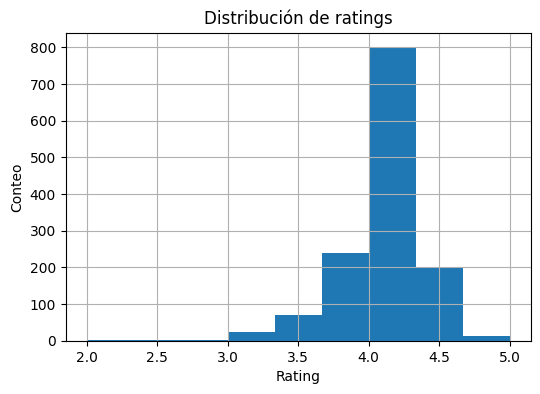

In [817]:
# Histograma
plt.figure(figsize=(6,4))
df_reviews['rating'].hist(bins=9)   # bins para medias estrellas
plt.xlabel('Rating')
plt.ylabel('Conteo')
plt.title('Distribución de ratings')
plt.show()


In [818]:
# Conteos y resumen
print(df_reviews['rating'].describe())    # media, std, min, max, etc.

# Ver si hay ceros o valores fuera de rango
print("Valores == 0:", (df_reviews['rating'] == 0).sum())
print("Valores < 1 o > 5:", ((df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)).sum())

# Mostrar ejemplos de filas con rating problemático
display(df_reviews.loc[(df_reviews['rating'] < 1) | (df_reviews['rating'] > 5)].head(10))


count    1350.000000
mean        4.091852
std         0.297444
min         2.000000
25%         3.900000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64
Valores == 0: 0
Valores < 1 o > 5: 0


,user_id,user_name,review_id,review_title,review_content,product_id,rating,rating_count


> Hay una fila con **NaN**, sin embargo, no fue considerado para la estadística básica, _pandas_ omite ese valor, los demás valores (1350 filas) son correctos.

In [819]:
# df_reviews = df_reviews[(df_reviews['rating'] >= 1) & (df_reviews['rating'] <= 5)]

- `Precios → Tenemos preguntas sobre actual_price, discounted_price, discount_percentage. Debemos revisar y eliminar precios negativos o absurdos (ejemplo: actual_price < discounted_price cuando no debería), así como definir un rango realista.`

In [820]:
# Antes de filtrar
print("Cantidad de filas originales:", len(df_products))

# Filtrar precios positivos
filtro_precios = (df_products['actual_price'] > 0) & (df_products['discounted_price'] > 0)
print("Filas con precios positivos:", filtro_precios.sum())
df_products = df_products[filtro_precios]

# Filtrar precios no absurdos
filtro_umbral = df_products['actual_price'] < 140000  # o el umbral que definas
print("Filas con actual_price < 140000:", filtro_umbral.sum())
df_products = df_products[filtro_umbral]

# Filtrar descuento válido
filtro_descuento = (df_products['discount_percentage'] >= 0) & (df_products['discount_percentage'] <= 100)
print("Filas con descuento válido (0-100%):", filtro_descuento.sum())
df_products = df_products[filtro_descuento]

# Filas finales
print("Cantidad de filas finales:", len(df_products))


Cantidad de filas originales: 1351
Filas con precios positivos: 1351
Filas con actual_price < 140000: 1351
Filas con descuento válido (0-100%): 1351
Cantidad de filas finales: 1351


Nulos en precios:
 actual_price        0
discounted_price    0
dtype: int64

Resumen estadístico:
        actual_price  discounted_price
count    1351.000000       1351.000000
mean     5690.510452       3304.587098
std     11218.918302       7174.024934
min        39.000000         39.000000
25%       899.000000        349.000000
50%      1790.000000        899.000000
75%      4575.000000       2174.000000
max    139900.000000      77990.000000

Precios <= 0:
actual_price        0
discounted_price    0
dtype: int64

Absurdos (discounted > actual): 0


,product_id,product_name,category,discounted_price,actual_price,discount_percentage,about_product


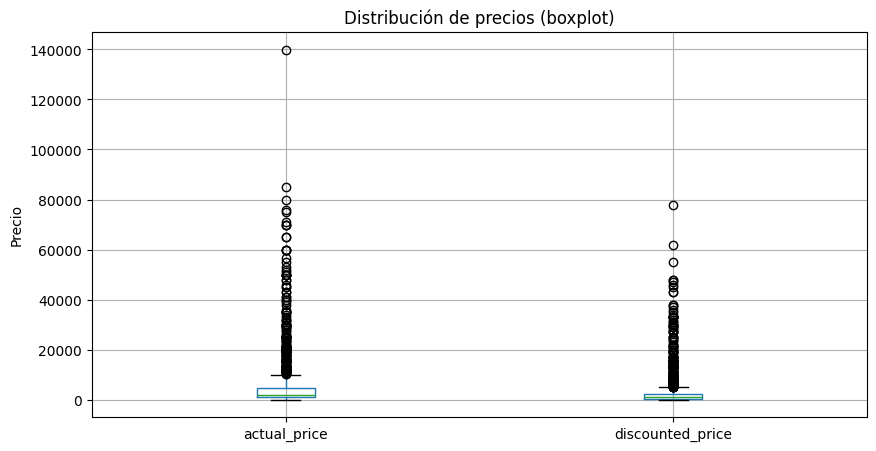

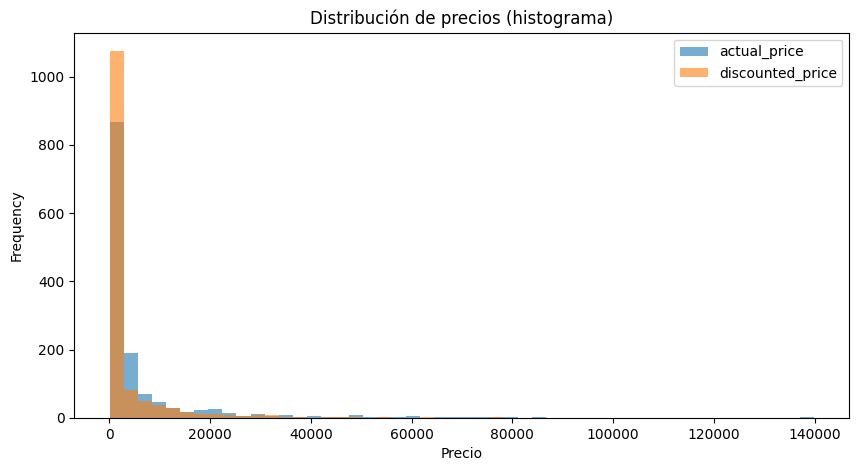

In [821]:
# 1. Revisar valores nulos
print("Nulos en precios:\n", df_products[['actual_price','discounted_price']].isnull().sum())

# 2. Revisar mínimos y máximos
print("\nResumen estadístico:")
print(df_products[['actual_price','discounted_price']].describe())

# 3. Ver cuántos precios negativos o cero
print("\nPrecios <= 0:")
print((df_products[['actual_price','discounted_price']] <= 0).sum())

# 4. Revisar absurdos: cuando el precio con descuento es mayor al original
absurdos = df_products[df_products['discounted_price'] > df_products['actual_price']]
print(f"\nAbsurdos (discounted > actual): {len(absurdos)}")
display(absurdos.head())

# 5. Gráfico: boxplot para ver outliers
plt.figure(figsize=(10,5))
df_products[['actual_price','discounted_price']].boxplot()
plt.title("Distribución de precios (boxplot)")
plt.ylabel("Precio")
plt.show()

# 6. Histograma para ver rango
df_products[['actual_price','discounted_price']].plot(kind='hist', bins=50, alpha=0.6, figsize=(10,5))
plt.title("Distribución de precios (histograma)")
plt.xlabel("Precio")
plt.show()

In [822]:
def detectar_precios_fuera_de_rango(df, precio_max=100000):
    """
    Marca filas con precios sospechosos o descuentos inconsistentes.
    
    Parámetros:
    - df: dataframe con columnas 'actual_price' y 'discounted_price'
    - precio_max: precio máximo considerado razonable
    
    Retorna:
    - df_outliers: dataframe con filas sospechosas
    """
    # Precios fuera de rango
    mask_precio = (df['actual_price'] > precio_max) | (df['discounted_price'] > precio_max)
    
    # Descuento negativo o descuento mayor al precio
    mask_descuento = df['discounted_price'] > df['actual_price']
    
    # Combinar
    mask_sospechoso = mask_precio | mask_descuento
    
    df_outliers = df[mask_sospechoso].copy()
    df_outliers['precio_fuera_rango'] = mask_precio
    df_outliers['descuento_invalido'] = mask_descuento
    
    return df_outliers

# Usar la función
df_outliers = detectar_precios_fuera_de_rango(df_products)
print(df_outliers.to_string())


     product_id                                                                      product_name                                                       category  discounted_price  actual_price  discount_percentage                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

> Distribución
- La gran mayoría de los precios (tanto actual_price como discounted_price) están concentrados en valores bajos (menores a 5,000).
- Existen algunos outliers muy altos (por ejemplo, un actual_price de hasta 139,900 y discounted_price de hasta 77,990).
- Esto genera una cola larga a la derecha en el histograma (distribución sesgada positivamente).

> Consistencia
- No hay nulos en los precios → ✅ limpio en ese aspecto.
- No hay precios <= 0 → ✅ bien.
- No hay casos absurdos (discounted_price > actual_price) → ✅ los descuentos son válidos.

- `rating_count (recuento de calificaciones) → Hay que asegurarse de no contar productos con rating_count = 0 porque no aportan.`

Cantidad de filas originales: 1351


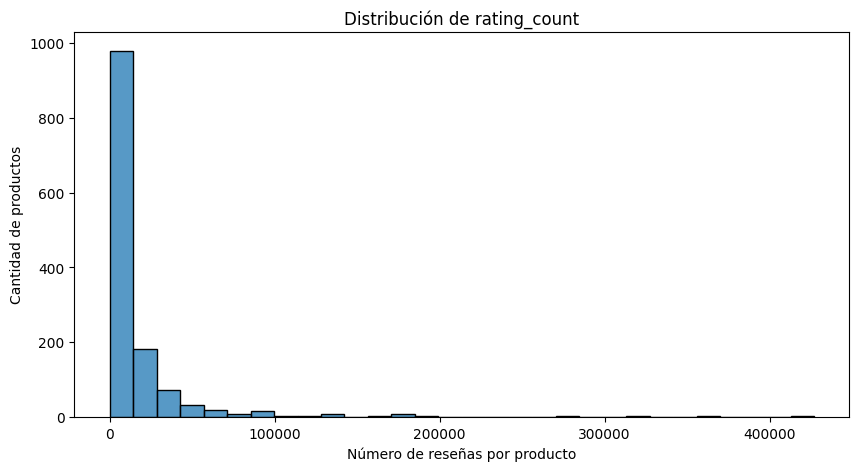

count      1351.000000
mean      17618.373797
std       42119.882419
min           0.000000
25%        1094.500000
50%        4736.000000
75%       15995.000000
max      426973.000000
Name: rating_count, dtype: float64
Productos con rating_count > 0: 1349
Productos con rating_count = 0 o NaN: 2
Cantidad de filas después del filtro: 1349


In [823]:
# 1. Cantidad de filas antes de filtrar
print("Cantidad de filas originales:", len(df_reviews))

# 2. Histograma para revisar distribución de rating_count
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df_reviews['rating_count'], bins=30, kde=False)
plt.title("Distribución de rating_count")
plt.xlabel("Número de reseñas por producto")
plt.ylabel("Cantidad de productos")
plt.show()

# 3. Revisar estadísticas descriptivas
print(df_reviews['rating_count'].describe())

# 4. Filtrar productos con rating_count > 0 y registrar cuántos se eliminan
filas_con_rating = df_reviews['rating_count'] > 0
print("Productos con rating_count > 0:", filas_con_rating.sum())
print("Productos con rating_count = 0 o NaN:", len(df_reviews) - filas_con_rating.sum())

df_reviews = df_reviews[filas_con_rating]

# 5. Cantidad de filas después de filtrar
print("Cantidad de filas después del filtro:", len(df_reviews))


> Distribución
- La gran mayoría de productos tienen pocas reseñas (entre 0 y unos cientos).
- Hay una cola muy larga hacia la derecha, con productos que llegan a tener cientos de miles de reseñas → esto es típico de distribuciones de popularidad (pocos productos muy populares concentran la mayoría de reseñas).
- Es una distribución altamente sesgada positivamente (right-skewed).

> Estadísticos

- Mínimo: 0 (2 productos sin reseñas).
- Mediana (50%): 4,736 → La mitad de los productos tiene ≤ 4,736 reseñas.
- Media (≈ 17,600): mucho más alta que la mediana → hay outliers que inflan el promedio.
- Máximo: 426,973 → un producto extremadamente popular.
- Desviación estándar (≈ 42,120): enorme en relación a la media → confirma la presencia de outliers.

# Unión de tablas 